# Convolutional Neural Network

Vamos construir uma rede neural para identificar digitos escritos a mão!

In [22]:
from keras.datasets import mnist # Mnist is the dataset for the 10 digits
from keras import models
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
from keras import callbacks
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [23]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

In [24]:
network = models.Sequential()
network.add(Conv2D(64, (3,3), input_shape = (28, 28, 1)))
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))
network.add(Conv2D(64, (3,3)))
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))
network.add(Flatten())
network.add(Dense(64, activation = 'relu'))
network.add(Dense(10, activation = 'softmax'))
network.compile(optimizer = 'adam',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
                                        mode ="min", patience = 20,  
                                        restore_best_weights = True)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


history = network.fit(train_images, train_labels, epochs = 10, batch_size = 32, validation_split = 0.2, callbacks = [earlystopping])

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1717 - accuracy: 0.9465 - val_loss: 0.0729 - val_accuracy: 0.9771
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0636 - accuracy: 0.9802 - val_loss: 0.0583 - val_accuracy: 0.9825
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0478 - accuracy: 0.9850 - val_loss: 0.0478 - val_accuracy: 0.9855
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0372 - accuracy: 0.9885 - val_loss: 0.0507 - val_accuracy: 0.9857
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0336 - accuracy: 0.9893 - val_loss: 0.0498 - val_accuracy: 0.9873
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0285 - accuracy: 0.9906 - val_loss: 0.0556 - val_accuracy: 0.9870
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0272 - accuracy: 0.9911 - val_loss: 0.0438 - val_accuracy:

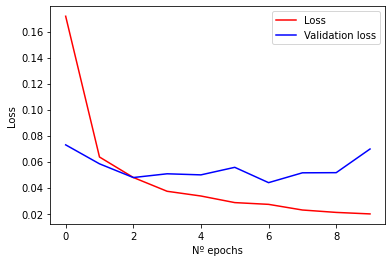

In [25]:
plt.plot(history.history['loss'], color = 'red', label = 'Loss')
plt.plot(history.history['val_loss'], color = 'blue', label = 'Validation loss')
plt.xlabel('Nº epochs')
plt.ylabel('Loss')
plt.legend()

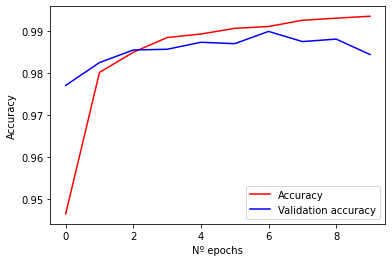

In [26]:
plt.plot(history.history['accuracy'], color = 'red', label = 'Accuracy')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'Validation accuracy')
plt.xlabel('Nº epochs')
plt.ylabel('Accuracy')
plt.legend()

In [27]:
pred = network.predict(test_images)

<Figure size 432x288 with 0 Axes>

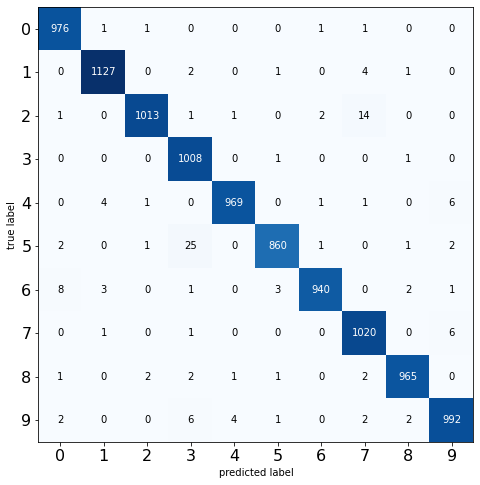

In [28]:
pred = np.argmax(pred, axis=-1)

# Original labels
test_labels = np.argmax(test_labels, axis=-1)

cm  = confusion_matrix(test_labels, pred)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(10), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], fontsize=16)
plt.yticks(range(10), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], fontsize=16)
plt.show()